
### Exercise 4. 
#### 4.1)Read the image peppers.png and convert it to grayscale and add Gaussian noise N (0, 625). Perform its low-rank approximation for k = 1, ..., n. 




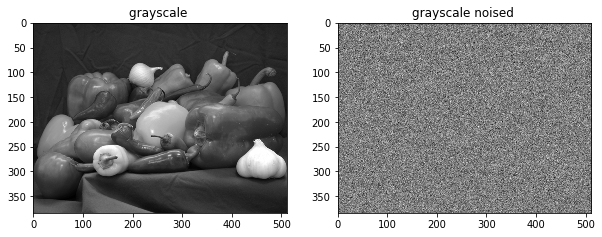

In [10]:
#4,1
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 
import numpy as np

def mse(imageA, imageB) -> float:
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err

def gaussianNoise(image, var, mean = 0):
      row,col = image.shape
      sigma = var**0.5
      randomGaus = np.random.normal(mean,sigma,(row,col))
      gaussNoiseMatrix = randomGaus.reshape(row,col)
      noisy = image + gaussNoiseMatrix
      return noisy, gaussNoiseMatrix

imagePepperMatrix = mpimg.imread("./data/peppers.png")
gray__imagePepperMatrix = cv2.cvtColor(
    imagePepperMatrix, 
    # cv2.COLOR_BGR2GRAY
    cv2.COLOR_RGB2GRAY
)
fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.title( "grayscale ")
plt.imshow(gray__imagePepperMatrix,  cmap='gray' )
noised__gray__imagePepperMatrix, noiseMatrix=  gaussianNoise(gray__imagePepperMatrix, 625, 0)
fig.add_subplot(1, 2, 2)
plt.title( "grayscale noised ")
plt.imshow(noised__gray__imagePepperMatrix,  cmap='gray' )
plt.show()


#### 4.2 Plot the dependence between the k and MSE of k-rank approximation version of original image. Make a conclusion.
The Plot the dependence between
the k and MSE of k-rank approximation version of original image. (mistake?)
I am plotting the approximation with grayscale noised image.

#### Conclusion 
The svd reconstruction ratio is maintained even with the noised image. 


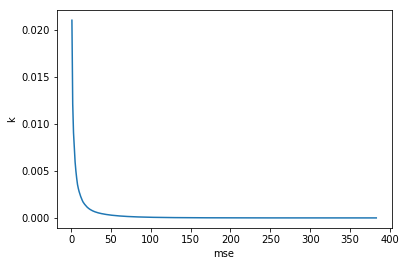

In [11]:
#### 4.2 Plot the dependence between the k and MSE of k-rank approximation version of original image. Make a conclusion.

def grayscale_compress_svd(image,k):
    """
    Perform svd decomposition and truncated (using k singular values/vectors) reconstruction
    returns
    --------
      reconstructed matrix reconst_matrix, array of singular values s
    """
    U,s,V = np.linalg.svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))   
    return reconst_matrix,s


def grayscale_compress_show_color_images_layer(image, k):
    """
     compress and display the reconstructed color image using the layer method 
    """
    original_shape = image.shape
    image_reconst_layers = grayscale_compress_svd(image ,k)
    image_reconst = image_reconst_layers
    return image_reconst[0]

mses = [
    (
        k,
        mse(
            gray__imagePepperMatrix,
            grayscale_compress_show_color_images_layer(gray__imagePepperMatrix,k)
        )
    )
    for k in range(1,384)
]
plt.plot(
    [i[0] for i in mses],
    [i[1] for i in mses]
)
plt.ylabel('k')
plt.xlabel('mse')
plt.show()
